In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_values():
    # Prof. R. Marchthaler's inital scenario
    vv = np.concatenate([np.zeros(100), np.arange(0.2, 2.2, 0.2), np.full(350, 2), 
                         np.arange(2.1, 3.1, 0.1), np.full(100, 3), np.arange(2.8, 0.8, -0.2), 
                         np.full(350, 1), np.arange(0.9, -0.1, -0.1), np.zeros(60)])
    kk = np.concatenate([np.zeros(150), np.arange(0.05, 0.45, 0.05), np.full(30, 0.4), 
                         np.arange(0.35, -0.05, -0.05), np.zeros(80), np.arange(-0.1, -0.9, -0.1),
                         np.full(11, -0.8), np.arange(-0.7, 0.1, 0.1), np.zeros(100), 
                         np.arange(-0.02, -0.22, -0.02), np.full(55, -0.2), np.arange(-0.18, 0.02, 0.2), 
                         np.zeros(35), np.arange(0.02, 0.22, 0.02), np.full(55, 0.2), np.arange(0.18, -0.02, -0.2), 
                         np.zeros(145), np.arange(0.01, 0.11, 0.01), np.full(165, 0.1), np.arange(0.09, -0.01, -0.01),
                         np.zeros(100)])
    return vv, kk

def generate_values_circle(radius, speed, num_points):
    """
    Generate values for circular trajectory.
    :param radius: Radius of the circle.
    :param speed: Constant speed.
    :param num_points: Number of points in the trajectory.
    :return: Arrays of vv (speed) and kk (curvature).
    """
    curvature = 1 / radius  # Curvature is 1/radius for a circle
    vv = np.full(num_points, speed)  # Constant speed
    kk = np.full(num_points, curvature)  # Constant curvature for a circle

    return vv, kk

def generate_line_circle_line_trajectory(line_length, radius, circle_length, speed):
    """
    Generate trajectory values for a straight line, followed by a half-circle, and then another straight line.
    :param line_length: Length of each straight line segment.
    :param radius: Radius of the half-circle.
    :param circle_length: Length of the half-circle segment.
    :param speed: Constant speed.
    :return: Arrays of vv (speed) and kk (curvature).
    """
    # Straight line: curvature = 0
    line_curvature = np.zeros(line_length)

    # Half-circle: curvature = 1/radius
    circle_curvature = np.full(circle_length, 1/radius)

    # Combine straight line, half-circle, and another straight line
    kk = np.concatenate([line_curvature, circle_curvature, line_curvature])

    # Constant velocity
    vv = np.full(len(kk), speed)

    return vv, kk

def generate_straight_line_half_circle_trajectory(total_points, radius, speed):
    # Divide total points among the three segments
    points_straight_line = total_points // 3
    points_half_circle = total_points - 2 * points_straight_line

    # Straight line: curvature = 0
    kk_straight_line = np.zeros(points_straight_line)

    # Half-circle: curvature = 1/radius
    kk_half_circle = np.full(points_half_circle, 1/radius)

    # Combine straight line, half-circle, and another straight line
    kk = np.concatenate([kk_straight_line, kk_half_circle, kk_straight_line])

    # Constant velocity
    vv = np.full(total_points, speed)
    return vv, kk


def generate_straight_line_increasing_speed(total_points, initial_speed, final_speed):
    """
    Generate values for a straight line trajectory with increasing speed.
    :param total_points: Number of points in the trajectory.
    :param initial_speed: Starting speed.
    :param final_speed: Ending speed.
    :return: Arrays of vv (speed) and kk (curvature).
    """
    # Linearly increasing speed
    vv = np.linspace(initial_speed, final_speed, total_points)

    # Zero curvature for a straight line
    kk = np.zeros(total_points)

    return vv, kk

def generate_straight_line(length, speed):
    """
    Generate values for a straight line segment.
    :param length: Number of points in the straight line.
    :param speed: Speed.
    :return: vv (speed) and kk (curvature) for the straight line.
    """
    vv = np.full(length, speed)  # Constant speed
    kk = np.zeros(length)  # Zero curvature for a straight line
    return vv, kk

# def generate_half_circle(radius, length, speed):
#     """
#     Generate values for a half-circle trajectory.
#     :param radius: Radius of the half-circle.
#     :param length: Number of points in the half-circle.
#     :param speed: Speed.
#     :return: vv (speed) and kk (curvature) for the half-circle.
#     """
#     vv = np.full(length, speed)  # Constant speed
#     kk = np.full(length, 1/radius)  # Constant curvature for a half-circle
#     return vv, kk

def generate_half_circle(radius, length, speed):
    """
    Generate values for a half-circle trajectory.
    :param radius: Radius of the half-circle.
    :param length: Number of points in the half-circle.
    :param speed: Speed.
    :return: vv (speed) and kk (curvature) for the half-circle.
    """
    vv = np.full(length, speed)  # Constant speed
    total_angle_change = np.pi  # Total angle change for half-circle
    kk = np.full(length, total_angle_change / length / radius)  # Curvature for half-circle
    return vv, kk


def generate_straight_increase_straight_trajectory(total_points, initial_speed, peak_speed, final_speed):
    """
    Generate trajectory values for a straight line with constant speed, followed by a section with increasing speed,
    and then another straight line with constant speed.
    :param total_points: Total number of points in the trajectory.
    :param initial_speed: Speed for the initial straight line segment.
    :param peak_speed: Peak speed for the increasing speed segment.
    :param final_speed: Speed for the final straight line segment.
    :return: Arrays of vv (speed) and kk (curvature).
    """
    # Divide total points among the three segments
    points_per_segment = total_points // 3

    # Generate values for each segment
    vv_initial, kk_initial = generate_straight_line(points_per_segment, initial_speed)
    vv_increase, kk_increase = generate_straight_line_increasing_speed(points_per_segment, initial_speed, peak_speed)
    vv_final, kk_final = generate_straight_line(points_per_segment, final_speed)

    # Concatenate the values for all segments
    vv = np.concatenate([vv_initial, vv_increase, vv_final])
    kk = np.concatenate([kk_initial, kk_increase, kk_final])

    return vv, kk


def concatenate_trajectories(vv1, kk1, vv2, kk2):
    """
    Concatenate two sets of trajectory values.
    :param vv1, kk1: Speed and curvature for the first trajectory.
    :param vv2, kk2: Speed and curvature for the second trajectory.
    :return: Concatenated vv and kk.
    """
    vv = np.concatenate([vv1, vv2])
    kk = np.concatenate([kk1, kk2])
    return vv, kk


def calculate_trajectory(vv, kk, D, Ts):
    vl = vv / (1 - kk * 0.5 * D)
    vr = vv / (1 + kk * 0.5 * D)
    t = Ts * np.arange(1, len(vv) + 1)
    xx, yy, aa, sl, sr = [0], [0], [0.3], [0.0211], [0]
    
    for k in range(1, len(vv)):
        xx.append(xx[-1] - vv[k - 1] * Ts * np.sin(aa[-1]))
        yy.append(yy[-1] + vv[k - 1] * Ts * np.cos(aa[-1]))
        aa.append(aa[-1] + vv[k - 1] * Ts * kk[k - 1])
        sl.append(sl[-1] + vl[k - 1] * Ts)
        sr.append(sr[-1] + vr[k - 1] * Ts)
    
    sl = np.round(100 * np.array(sl)) / 100
    sr = np.round(100 * np.array(sr)) / 100
    
    return np.array(xx), np.array(yy), np.array(aa), sl, sr, t


def add_noise(xx, yy, Rxy):
    # Transpose Rxy to match the shape of the [xx, yy] array
    Rxy_transposed = Rxy.T
    y = np.vstack([xx, yy]).T + np.sqrt(Rxy_transposed) * np.random.randn(*Rxy_transposed.shape)
    return y

def save_data(t, y, xx, yy, aa, kk, vv, filename):
    data = pd.DataFrame({
        'time': t,
        'Pos_x': y[:, 0],
        'Pos_y': y[:, 1],
        'GT_x': xx,
        'GT_y': yy,
        'GT_alpha': aa,
        'GT_Kr': kk,
        'GT_v': vv
    })
    data.to_csv(filename, sep=',', index=False)

def plot_data(y, xx, yy, t, aa, kk, vv, title=None):
    plt.figure(1)
    plt.clf()
    plt.plot(y[:, 0], y[:, 1], 'r:', label='Noisy Trajectory')
    plt.plot(xx, yy, 'g', label='Ground Truth')
    plt.title('Trajectory Plot')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.axis('equal')
    
    plt.figure(2)
    plt.clf()
    
    plt.subplot(311)
    plt.plot(t, aa, 'g')
    plt.title('Alpha / Time')
    plt.xlabel('Time')
    plt.ylabel('Alpha')
    
    plt.subplot(312)
    plt.plot(t, kk, 'g')
    plt.title('Curvature / Time')
    plt.xlabel('Time')
    plt.ylabel('Curvature')

    plt.subplot(313)
    plt.plot(t, vv, 'g')
    plt.title('Speed / Time')
    plt.xlabel('Time')
    plt.ylabel('Speed')

    plt.tight_layout()

    # Set the plot title
    if title is not None:
        plt.title(title)

    # Show or save the plot
    plt.show()
    plt.show()


def process_scenario(vv, kk, filename, D, Ts, Rxy_lengths, Rxy_values):
    # Calculate trajectory
    xx, yy, aa, sl, sr, t = calculate_trajectory(vv, kk, D, Ts)

    # Add noise
    Rxy = np.hstack([np.full((2, length), value) for length, value in zip(Rxy_lengths, Rxy_values)]) * 1e-2
    y = add_noise(xx, yy, Rxy)

    # Save data
    save_data(t, y, xx, yy, aa, kk, vv, filename)

    # Print filename
    print(f"Plotting and saving data for: {filename}")

    # Plot data with title
    plot_data(y, xx, yy, t, aa, kk, vv, title=filename)

    


Plotting and saving data for: straight_line_const_speed.csv


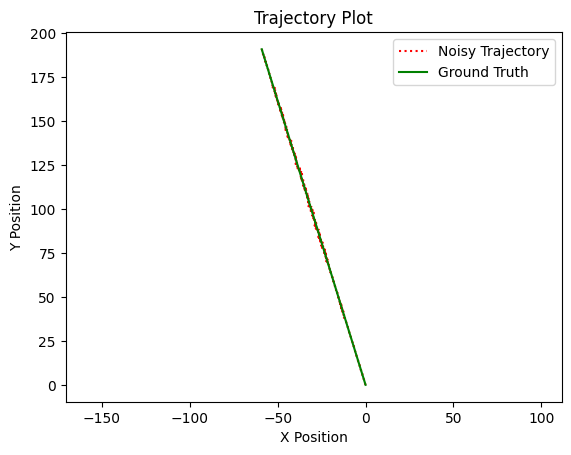

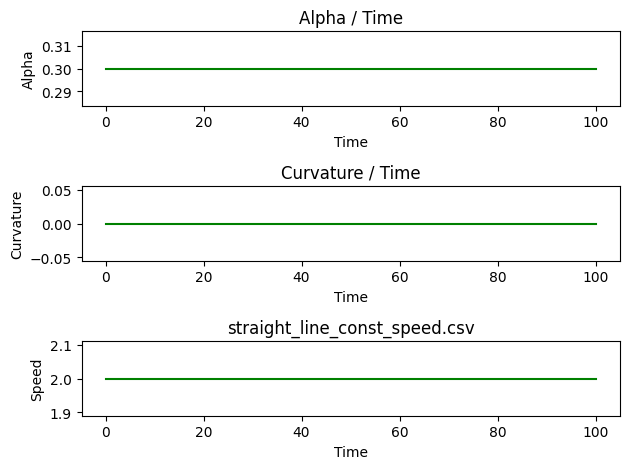

Plotting and saving data for: straight_line_increasing_speed.csv


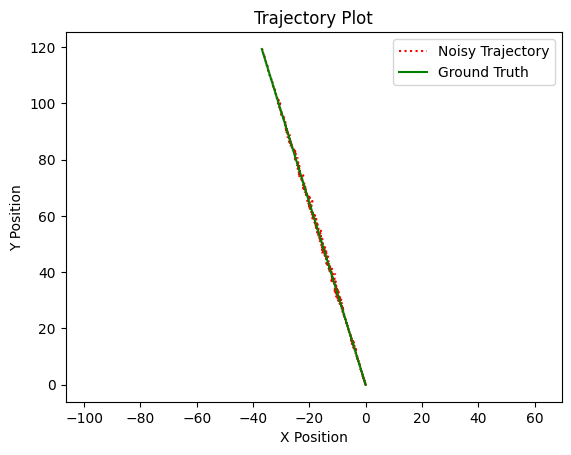

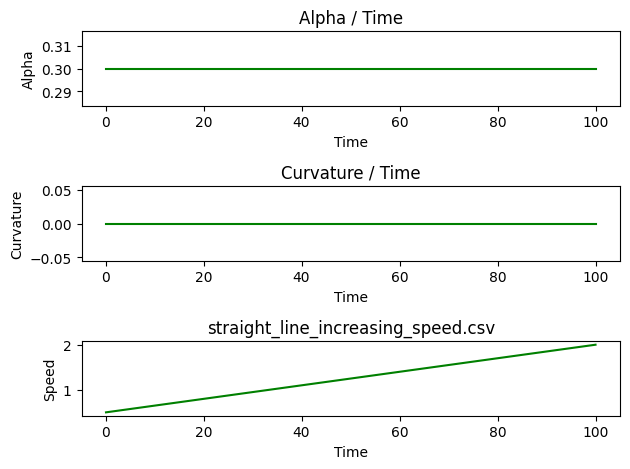

Plotting and saving data for: straight_increase_straight.csv


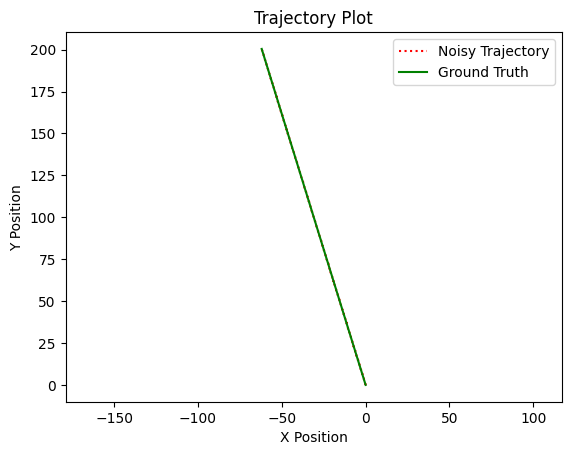

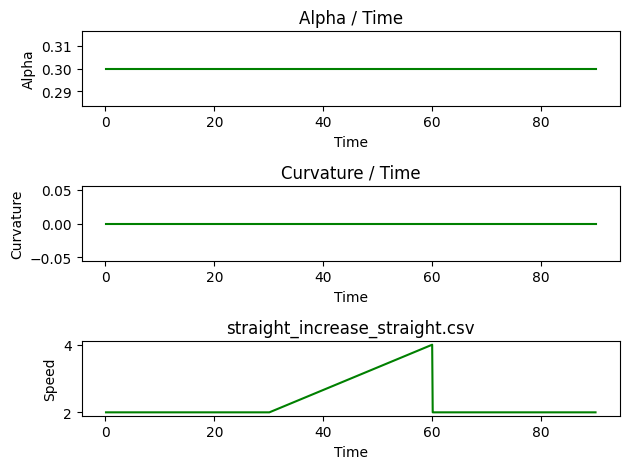

In [2]:
def main():

    # Scenario generation (simulated data)
    # - plots
    # - save data

    D = 0.1
    Ts = 0.1

    # Corrected Rxy generation
    Rxy_lengths = [200, 50, 100, 30, 300, 220, 100]
    Rxy_values = [0.5, 5, 1, 5, 20, 10, 1]
    Rxy = np.hstack([np.full((2, length), value) for length, value in zip(Rxy_lengths, Rxy_values)]) * 1e-2

    # vv_straight, kk_straight = generate_straight_line(length=500, speed=2)
    # vv_half_circle, kk_half_circle = generate_half_circle(radius=1, length=500, speed=2)
    # vv, kk = concatenate_trajectories(vv_straight, kk_straight, vv_half_circle, kk_half_circle)
    # process_scenario(vv, kk, 'csv_files/straight_half_circle.csv', D, Ts, Rxy_lengths, Rxy_values)

    # vv, kk = generate_straight_line_increasing_speed(total_points=1000, initial_speed=0.5, final_speed=2)
    # process_scenario(vv, kk, 'csv_files/straight_line_increasing_speed.csv', D, Ts, Rxy_lengths, Rxy_values)

    # vv, kk = generate_straight_line_half_circle_trajectory(total_points=1000, radius=2, speed=2)
    # process_scenario(vv, kk, 'csv_files/straight_line_half_circle.csv', D, Ts, Rxy_lengths, Rxy_values)

    # vv, kk = generate_values_circle(radius=10, speed=2, num_points=1000)
    # process_scenario(vv, kk, 'csv_files/circular_trajectory.csv', D, Ts, Rxy_lengths, Rxy_values)


    vv_straight, kk_straight = generate_straight_line(length=1000, speed=2)
    process_scenario(vv_straight, kk_straight, 'straight_line_const_speed.csv', D, Ts, Rxy_lengths, Rxy_values)

    vv, kk = generate_straight_line_increasing_speed(total_points=1000, initial_speed=0.5, final_speed=2)
    process_scenario(vv, kk, 'straight_line_increasing_speed.csv', D, Ts, Rxy_lengths, Rxy_values)


    # total_points = 900
    # initial_speed = 2
    # peak_speed = 4
    # final_speed = 2

    # vv, kk = generate_straight_increase_straight_trajectory(total_points, initial_speed, peak_speed, final_speed)

    # # You can then use the `calculate_trajectory` and `plot_data` functions to calculate and plot the trajectory.
    # xx, yy, aa, sl, sr, t = calculate_trajectory(vv, kk, D=0.5, Ts=0.1)
    # plot_data(xx, yy, t, aa, kk, vv)

    # Define the parameters for the scenario
    total_points = 900
    initial_speed = 2
    peak_speed = 4
    final_speed = 4
    filename = "straight_increase_straight.csv"
    D = 0.5  # Wheelbase
    Ts = 0.1  # Sampling time

    # Generate the trajectory
    vv, kk = generate_straight_increase_straight_trajectory(total_points, initial_speed, peak_speed, final_speed)

    # Define the noise parameters (lengths and values for each segment)
    Rxy_lengths = [total_points // 3, total_points // 3, total_points - 2 * (total_points // 3)]
    Rxy_values = [0.5, 1, 0.5]  # Adjust these values based on the desired noise levels

    # Process the scenario (calculate trajectory, add noise, save data, and plot)
    process_scenario(vv, kk, filename, D, Ts, Rxy_lengths, Rxy_values)



    # EKF
    # EKF Rose R
    # EKF Rose Q


if __name__ == "__main__":
    main()